In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math
from sklearn.linear_model import LinearRegression

In [29]:
data = pd.read_json('./example_input.json')
ethbtc = data[data['symbol'] == 'ETHBTC']
ethbtc.reset_index(drop=True, inplace=True)

In [30]:
def parseSymbols(data):
    eth = data[data['symbol'] == 'ETHBTC']
    eth.reset_index(drop=True, inplace=True) # reset the index to use datetime
    matic = data[data['symbol'] == 'MATICBTC']
    matic.reset_index(drop=True, inplace=True)
    xrp = data[data['symbol'] == 'XRPBTC']
    xrp.reset_index(drop=True, inplace=True)
    ltc = data[data['symbol'] == 'LTCBTC']
    ltc.reset_index(drop=True, inplace=True)
    neo = data[data['symbol'] == 'NEOBTC']
    neo.reset_index(drop=True, inplace=True)
    algo = data[data['symbol'] == 'ALGOBTC']
    algo.reset_index(drop=True, inplace=True)
    bnb = data[data['symbol'] == 'BNBBTC']
    bnb.reset_index(drop=True, inplace=True)

    return eth, matic, xrp, ltc, neo, algo, bnb

In [34]:
aa = parseSymbols(data)
df_merged = pd.concat(aa)

,timestamp,symbol,close,open,high,low
0,2023-02-27 08:43:46.014,ETHBTC,0.069916,0.069080,0.070000,0.068934
1,2023-02-27 08:43:48.013,ETHBTC,0.069917,0.069080,0.070000,0.068934
2,2023-02-27 08:43:50.013,ETHBTC,0.069919,0.069079,0.070000,0.068934
3,2023-02-27 08:43:50.758,ETHBTC,0.069920,0.069079,0.070000,0.068934
4,2023-02-27 08:43:52.011,ETHBTC,0.069921,0.069079,0.070000,0.068934
5,2023-02-27 08:43:54.117,ETHBTC,0.069922,0.069079,0.070000,0.068934
6,2023-02-27 08:43:55.855,ETHBTC,0.069927,0.069079,0.070000,0.068934
7,2023-02-27 08:43:56.011,ETHBTC,0.069927,0.069079,0.070000,0.068934
8,2023-02-27 08:43:58.022,ETHBTC,0.069928,0.069079,0.070000,0.068934
9,2023-02-27 08:43:59.668,ETHBTC,0.069928,0.069079,0.070000,0.068934


In [5]:
def get_sma(data):
    return data.rolling(2).mean()

In [6]:
def get_bollinger_bands(data):
    sma = get_sma(data)
    std = data.rolling(2).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band

    return bollinger_up, bollinger_down

In [7]:
data = yf.download('IBM','2020-01-01', '2021-05-12')

[*********************100%***********************]  1 of 1 completed


In [10]:
out = data.to_json(orient='records')
with open('file_name.json', 'w') as f:
    f.write(out)
# series = data['Close']
# series.index = np.arange(series.shape[0])

In [130]:
def pythag_distance(pt1, pt2):
    """
    Calculates the pythagoras distance between two pts
    """
    a = (pt2[0] - pt1[0]) ** 2
    b = (pt2[1] - pt1[1]) ** 2
    return math.sqrt(a + b) #c2 = a2 + b2

def local_min_max(pts):
    """
    Finds the local min & values of a given list of Closing prices
    Loops through the pts list, if current point is greater than next point and previous point, append to local max
    """
    local_min = []
    local_max = []
    
    prev_pts = [(0, pts[0]), (1, pts[1])]

    for i in range(1, len(pts) - 1):
        append_to = ''
        if pts[i-1] > pts[i] < pts[i+1]:
            append_to = 'min'
        elif pts[i-1] < pts[i] > pts[i+1]:
            append_to = 'max'
        if append_to:
            if local_min or local_max:
                prev_distance = pythag_distance(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythag_distance(prev_pts[1], (i, pts[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, pts[i])
                    if append_to == 'min':
                        local_min.append((i, pts[i]))
                    else:
                        local_max.append((i, pts[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, pts[i])
                if append_to == 'min':
                    local_min.append((i, pts[i]))
                else:
                    local_max.append((i, pts[i]))
    return local_min, local_max

def regression_coefficient(pts):
    """
    Use a simple linear regression model to find line of best fit & y intercept
    """
    X = np.array([pt[0] for pt in pts])
    Y = np.array([pt[1] for pt in pts])

    X = X.reshape(-1,1)

    model = LinearRegression()
    model.fit(X, Y)
    return model.coef_[0], model.intercept_

In [131]:
bollinger_up, down = get_bollinger_bands(series)
local_min, local_max = local_min_max(series)

local_min_slope, local_min_intercept = regression_coefficient(local_min) 
local_max_slope, local_max_intercept = regression_coefficient(local_max) 

support = (local_min_slope * np.array(series.index)) + local_min_intercept
resistance = (local_max_slope * np.array(series.index)) + local_max_intercept

In [119]:
# plt.xlabel('Days')
# plt.ylabel('Prices')
# plt.plot(series) # Just the closing prices
# plt.plot(support, label='Support', c='r')
# plt.plot(resistance, label='Resistance', c='g')
# plt.legend()
# plt.show()

In [132]:
def get_rsi(close, lookback):
    return_prices = close.diff()

    # Create empty array to store differences (i.e losses vs gains)
    change_up = []
    change_down = []

    # Loop through the return prices, and determine losses vs gains
    for i in range(len(return_prices)):
        if return_prices[i] < 0:
            change_up.append(0)
            change_down.append(return_prices[i])
        else:
            change_up.append(return_prices[i])
            change_down.append(0)
    
    up_series = pd.Series(change_up)
    down_series = pd.Series(change_down).abs()

    # Find the exponentially weight moving average to give more weight to the recent values (e.g lookback period)
    up_ewm = up_series.ewm(com=lookback-1, adjust=False).mean()
    down_ewm = down_series.ewm(com=lookback-1, adjust=False).mean()

    # Following the rsi formula
    rs = up_ewm/down_ewm
    rsi = 100 - (100/(1+rs))
    rsi_df = pd.DataFrame(rsi).rename(columns={0: 'rsi'}).set_index(close.index)

    # rsi_df = rsi_df.dropna()
    return rsi_df[3:]

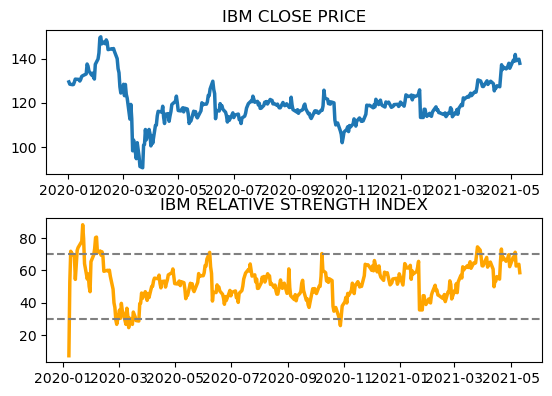

In [133]:
data['rsi_14'] = get_rsi(data['Close'], 14)
# data = data.dropna()

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(data['Close'], linewidth = 2.5)
ax1.set_title('IBM CLOSE PRICE')
ax2.plot(data['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('IBM RELATIVE STRENGTH INDEX')
plt.show()


In [134]:
def rsi_signals(prices, rsi):
    """
    Determines buy and sell signals
    :param prices list: list of closing prices
    :param rsi list: Relative strength index
    :return list buy_price, sell_price, rsi_signal
    """
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        # If Condition for buy signal
        if (rsi[i-1] > 30 and rsi[i] < 30):
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
                
        # If condition for sell signal
        elif (rsi[i-1] < 70 and rsi[i] > 70):
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)

        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
    
    return buy_price, sell_price, rsi_signal


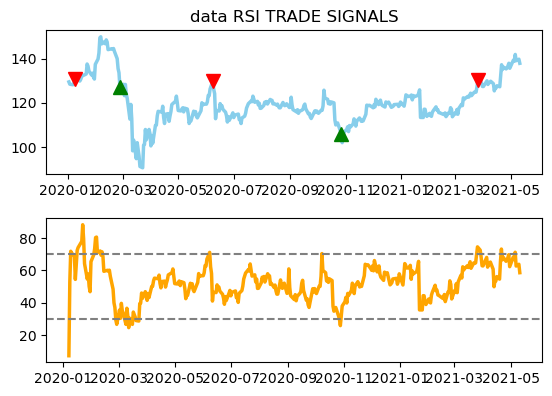

In [135]:
buy, sell, rsi_sig = rsi_signals(data['Close'], data['rsi_14'])

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(data['Close'], linewidth = 2.5, color = 'skyblue', label = 'data')
ax1.plot(data.index, buy, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(data.index, sell, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('data RSI TRADE SIGNALS')
ax2.plot(data['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()

### Data formats

Bollinger Bands (Up/Down) - Both 1D Array (DF - need to convert to simple arr) with same length as input\
Support - 1D Array with same length as input\
Resistance - same as support\
RSI - 1D Array with same length as input\
Buy/Sell - Arbitrary length of list<number>


In [136]:
def get_ema(data, days=2, smoothing_value=2):
    """
    Get the exponential moving average, similar to SMA, however uses the previous
    data which performs better for exponential movement
    :param data list: List of closing prices
    :param days int: Rate of day
    :param smoothing_value int: smoothing value
    :return : List of ema values
    """
    first_ema = sum(data[:days])/days # SMA
    ema = [first_ema]
    
    for price in data[days:]:
        ema.append((price * (smoothing_value / (1 + days))) + ema[-1] * (1 - (smoothing_value / (1 + days))))
        
    return ema

In [125]:
data

,Open,High,Low,Close,Adj Close,Volume,rsi_14
Date,,,,,,,
2020-01-08,128.594650,129.885284,128.030594,129.359467,110.142967,4545916,52.899145
2020-01-09,129.770554,130.774384,129.359467,130.726578,111.306984,3902208,71.911256
2020-01-10,130.975143,131.806885,130.315491,130.678772,111.266289,3405148,70.834524
2020-01-13,129.521988,130.630981,129.130020,130.592728,111.193031,3693426,68.836699
2020-01-14,130.286804,131.108994,129.588913,129.847031,110.558105,3850326,54.492558
...,...,...,...,...,...,...,...
2021-05-05,139.521988,139.521988,138.594650,138.833649,126.071564,5229895,66.741361
2021-05-06,138.871887,141.978973,138.795410,141.892929,128.849640,7848661,71.295578
2021-05-07,139.502869,139.713196,138.212234,139.063095,127.690880,7325661,62.737733


In [159]:
data['bollinger_up'], data['bollinger_down'] = get_bollinger_bands(data['Close'])
data['support'], data['resistance'] = support, resistance
rsi = data['rsi_14']
buy, sell, sigs = rsi_signals(data['Close'], rsi)
# buy_prices = {}

data['symbol'] = 'AAPL'

# buy_prices[data['symbol'].iloc[0] + '_buy'] = buy
# buy_prices[data['symbol'].iloc[0] + '_sell'] = sell

exp = get_ema(data['Close'])
exp.append(exp[-1])
data['exponential_moving_avg'] = exp

In [163]:
data['sell_ind'] = sell
data['buy_ind'] = buy